In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1134, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 311, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/hhassani/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/hhassani/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
data = pd.read_csv('tiktok_dataset.csv')

## Exploring the data

In [ ]:
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
data.shape

(19382, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

The dataframe contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.

Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

### Checking for and handling missing values and duplicates

In [ ]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
data.duplicated().sum()

0

### Investigating the variables

I will start by examining the claim_status variable.

In [ ]:
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

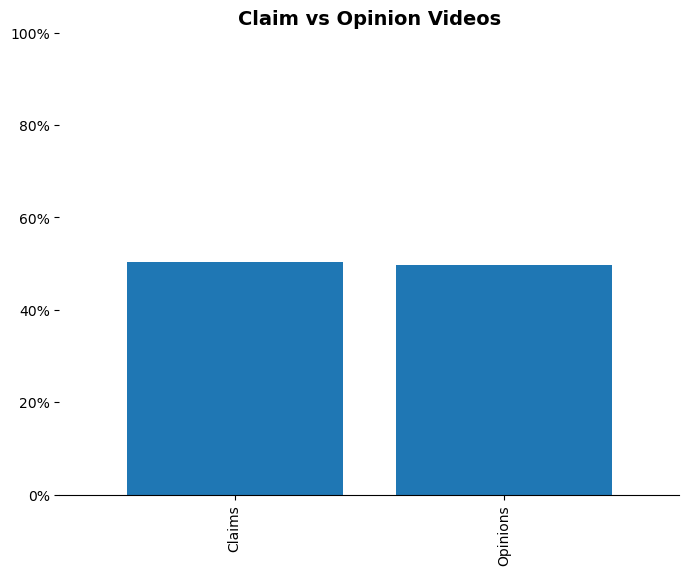

In [ ]:
classes = data['claim_status'].value_counts(normalize = True)*100

fig, ax = plt.subplots(figsize=(8,6))
classes.plot(kind = 'bar', width = 0.8)
sns.despine(left = True)

ax.set_title('Claim vs Opinion Videos', fontsize = 14,  weight = 'bold')
ax.set_ylim(0,100)

class_labels = ['Claims', 'Opinions']  
ax.set_xticks(range(len(class_labels)))
ax.set_xticklabels(class_labels)

def to_percent(y, position):
    return str(int(y)) + '%'
formatter = FuncFormatter(to_percent)
ax.yaxis.set_major_formatter(formatter)


In [ ]:
claims = data[data['claim_status'] == 'claim']

print('Mean view count of claims:', claims['video_view_count'].mean())
print('Median view count of claims:', claims['video_view_count'].median())

Mean view count of claims: 501029.4527477102
Median view count of claims: 501555.0


In [ ]:
opinion = data[data['claim_status'] == 'opinion']

print('Mean view count of opinion:', claims['video_view_count'].mean())
print('Median view count of opinion:', claims['video_view_count'].median())

Mean view count of opinion: 501029.4527477102
Median view count of opinion: 501555.0


The counts of each claim status are quite balanced.

The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [ ]:
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, at this stage, it is hard to know if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service. While a conclusion can be made about banned/active authors, no conclusion can be drawn about banned videos. The author_ban_status needs further investigaiton. 



In [ ]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count':['count','mean', 'median'],
    'video_like_count': ['count','mean', 'median'],
    'video_share_count': ['count','mean', 'median']}).round(2)

video_view_count                      video_like_count  \
                             count       mean    median            count   
author_ban_status                                                          
active                       15383  215927.04    8616.0            15383   
banned                        1635  445845.44  448201.0             1635   
under review                  2066  392204.84  365245.5             2066   

                                       video_share_count                     
                        mean    median             count      mean   median  
author_ban_status                                                            
active              71036.53    2222.0             15383  14111.47    437.0  
banned             153017.24  105573.0              1635  29998.94  14468.0  
under review       128718.05   71204.5              2066  25774.70   9444.0

A few observations stand out here:
* Banned authors and those under review get far more views, likes, and shares than active authors.
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

I delve deeper in the engagemeent of videos.

In [ ]:
data_coppied = data.copy()

data_coppied['likes_per_view'] = data_coppied['video_like_count'] / data_coppied['video_view_count']

data_coppied['comments_per_view'] = data_coppied['video_comment_count'] / data_coppied['video_view_count']

data_coppied['shares_per_view'] = data_coppied['video_share_count'] / data_coppied['video_view_count']

In [ ]:
data_coppied.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

It can be concluded that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, when a video does get viewed, its engagement rate is less related to author ban status and more related to its claim status.

Also, claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

It seems that engagement level is strongly correlated with claim status, and this should be a focus of further inquiry.

Based on the above examinaiton, the two variables that are most likely to help build a predictive model are claim_status and opinion_status. Those two variables are most likely to be helpful because those variables denote claims and opinions. That way, I can create a classification model to differentiate the two variables, as is the ultimate goal of this project.

### Investigating distribution of variables

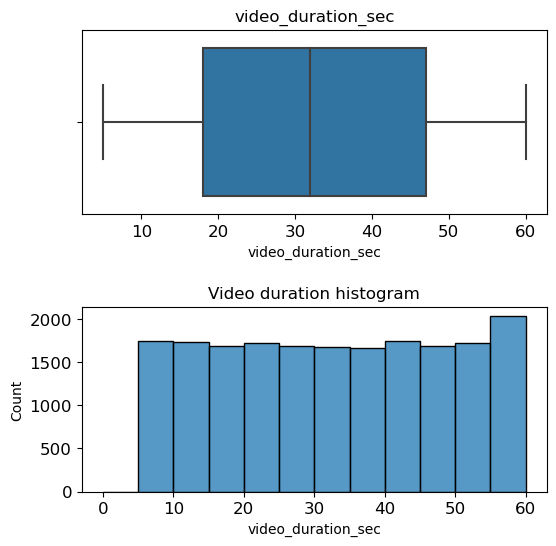

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (6,6))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x=data['video_duration_sec'], ax = axes[0])
axes[0].set_title('video_duration_sec', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.histplot(data['video_duration_sec'], bins=range(0,61,5), ax = axes[1])
axes[1].set_title('Video duration histogram');
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


plt.show()


All videos are 5-60 seconds in length, and the distribution is uniform.

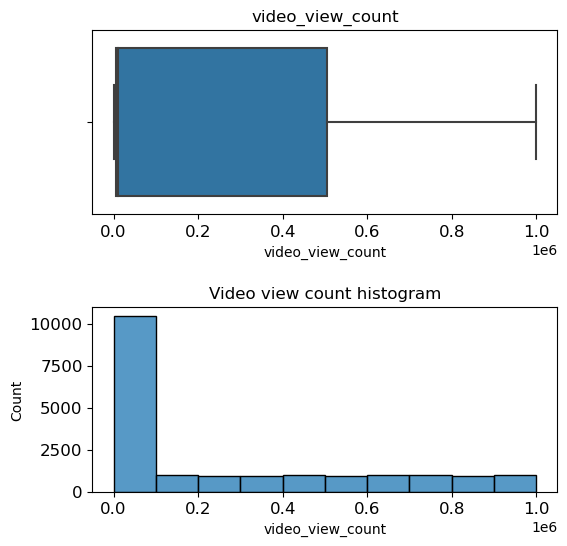

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (6,6))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x=data['video_view_count'], ax = axes[0])
axes[0].set_title('video_view_count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.histplot(data['video_view_count'],bins=range(0,(10**6+1),10**5), ax = axes[1])
axes[1].set_title('Video view count histogram');
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


plt.show()


**video_view_count** has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

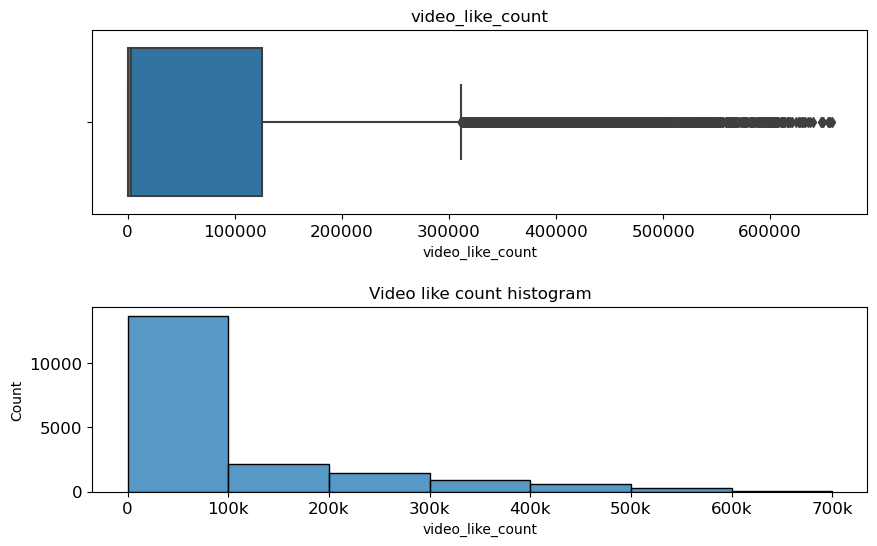

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (10,6))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x=data['video_like_count'], ax = axes[0])
axes[0].set_title('video_like_count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.histplot(data['video_like_count'],bins=range(0,(7*10**5+1),10**5), ax = axes[1])
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
axes[1].set_xticks(range(0,7*10**5+1,10**5), labels=labels)
axes[1].set_title('Video like count histogram');
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


plt.show()


Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

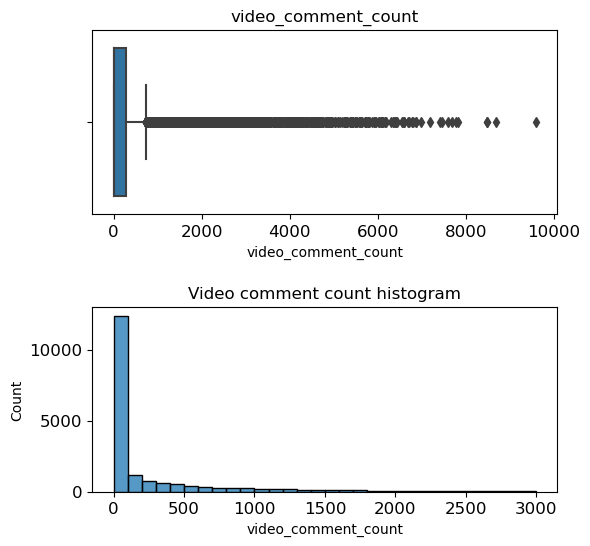

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (6,6))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x=data['video_comment_count'], ax = axes[0])
axes[0].set_title('video_comment_count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.histplot(data['video_comment_count'],bins=range(0,(3001),100), ax = axes[1])
axes[1].set_title('Video comment count histogram');
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


plt.show()


Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

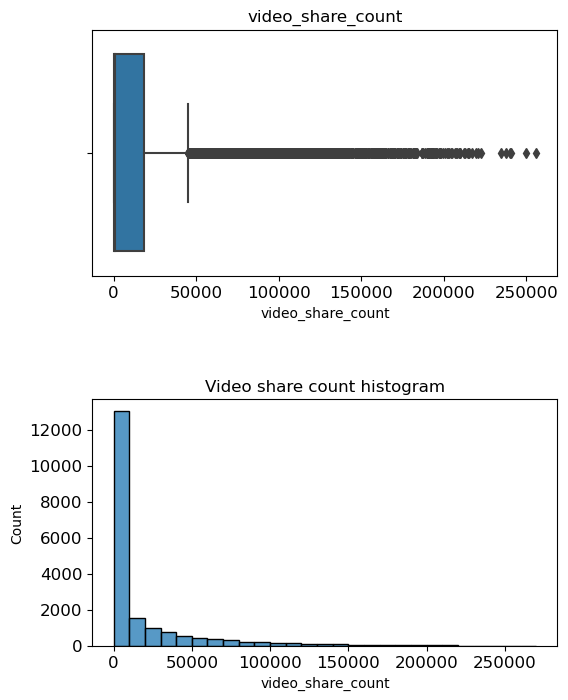

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (6,8))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x=data['video_share_count'], ax = axes[0])
axes[0].set_title('video_share_count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.histplot(data['video_share_count'],bins=range(0,(270001),10000), ax = axes[1])
axes[1].set_title('Video share count histogram');
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.show()

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed 

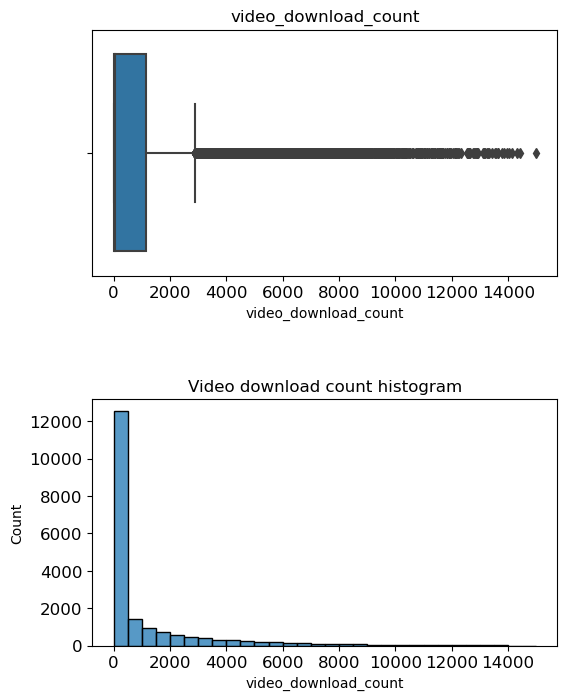

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (6,8))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x=data['video_download_count'], ax = axes[0])
axes[0].set_title('video_download_count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.histplot(data['video_download_count'],bins=range(0,(15001),500), ax = axes[1])
axes[1].set_title('Video download count histogram');
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)



plt.show()

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

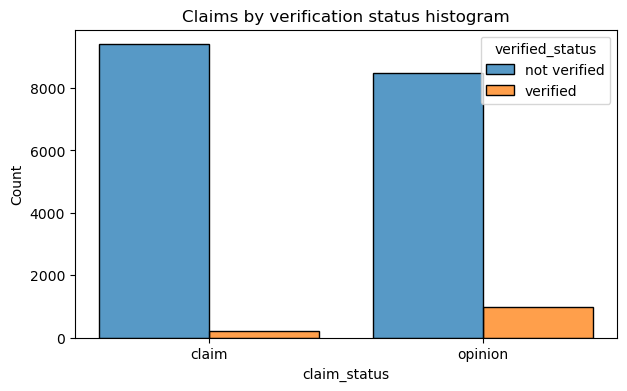

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data = data,
            x = 'claim_status',
            hue = 'verified_status',
            multiple = 'dodge',
            shrink = 0.8)
plt.title('Claims by verification status histogram');



There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

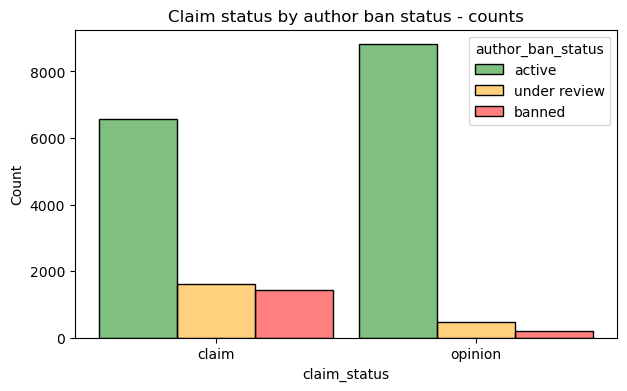

In [ ]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');


For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

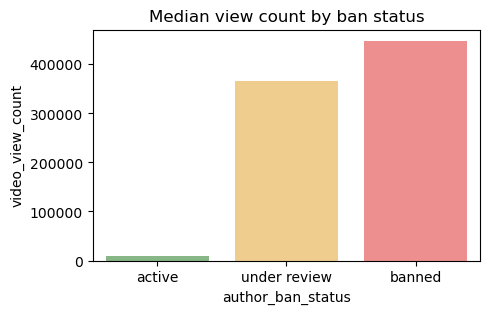

In [ ]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');


The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

In [ ]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

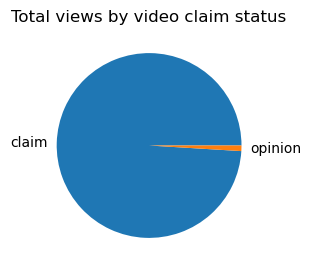

In [ ]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');


The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

When building predictive models, the presence of outliers can be problematic. They can introduce bias to a model, and indicate problems with how data was captured or recorded.

The ultimate objective of this project is to build a model that predicts whether a video is a claim or opinion. The above analysis indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Next, I want to have a breif look at the engamgeme level of claim and opinion videos.

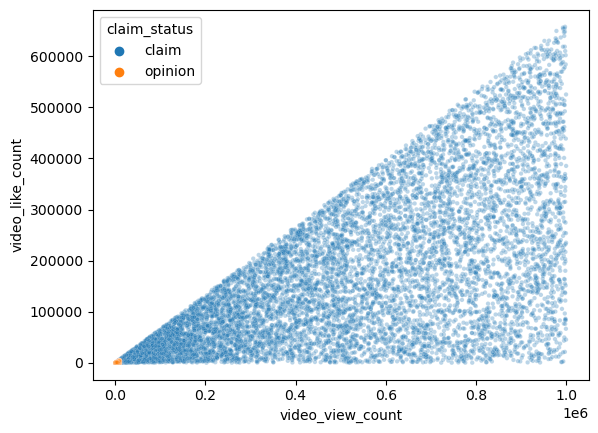

In [ ]:
fig = sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()


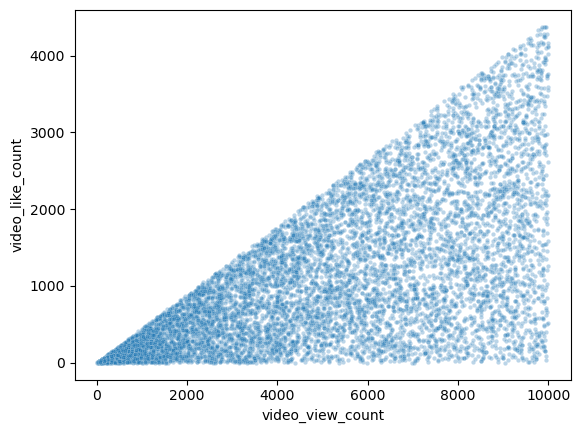

In [ ]:
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()


#### **Checking for and handling ouliers**

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. I would like to know how many of the data points can be considered outliers.

In [ ]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


All counts variables have significant number of data points that are above the outlier threshold. Below, I will handle the outliers by replacing them with maximum threshold of the distribution of data.

In [ ]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    data.loc[data[column] > upper_limit, column] = upper_limit

### Difference between view count of videos posted by verified and unverified accounts

Having investigated the variables, now, I delve deep into relationship between verified_status and video_view_count. For that, I would like to examine the mean values of video_view_count for each group of verified_status by conducting a two sample t-test.

I want to test following hypothesis with a 95% significant level:

**Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [ ]:
not_verified = data[data['verified_status'] == 'not verified']['video_view_count']
verified = data[data['verified_status'] == 'verified']['video_view_count']

stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

Since the p-value is extremely small (much smaller than the significance level of 5%), I reject the null hypothesis and conclude that there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

This suggests there might be fundamental behavioral differences between these two groups of accounts.

It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait videos? Or are unverified accounts associated with spam bots that help inflate view counts?

In the next step, I will build a regression model on verified_status. 


## Features' associaiton with verified status


Since there is a statistically significant difference in the mean video view count between `verified` and `unverified` accounts, at this stage, I am interested in how different variables are associated with whether a user is verified. The earlier observation indicated that if a user is verified, they are much more likely to post opinions. Now, I want to explore how to predict verified status to help understand how video characteristics relate to verified users. Therefore, I will conduct a logistic regression using verified status as the outcome variable. The results would be used to inform the final model related to predicting whether a video is a claim vs an opinion.

In [ ]:
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced. It needs to be balanced for a reliable model.

In [ ]:

data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

data_minority_upsampled = resample(data_minority,
                                 replace=True,                 
                                 n_samples=len(data_majority), 
                                 random_state=0)               

data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Following, I will get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts. Then, will extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [ ]:
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [ ]:
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [ ]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


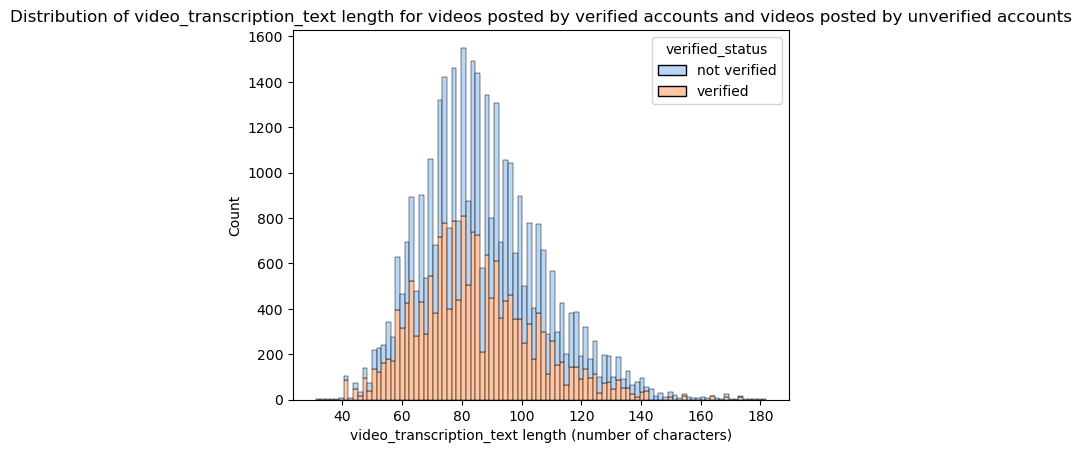

In [ ]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()


### Examining the correlations of variables

In [ ]:
data_upsampled.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.619090,-0.611317,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,-0.000888,0.012784,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.001875,0.008972,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.794957,0.782352,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.888427,0.873458,0.818032,0.216693
video_share_count,-0.619090,-0.000888,0.001875,0.794957,0.888427,1.000000,0.803551,0.766203,0.208529
video_download_count,-0.611317,0.012784,0.008972,0.782352,0.873458,0.803551,1.000000,0.911894,0.216871
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.766203,0.911894,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.208529,0.216871,0.217661,1.000000


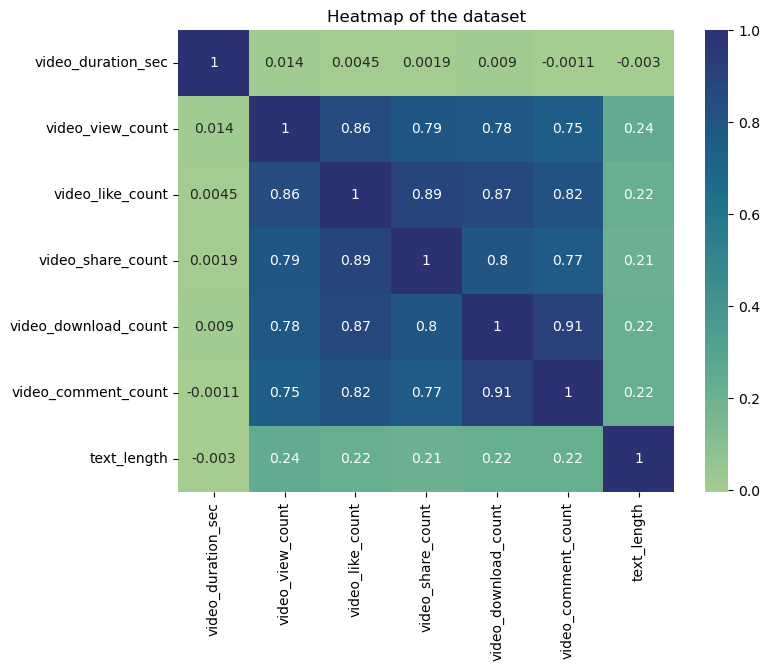

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()


The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.86 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, I would exclude `video_like_count`. And among the variables that quantify video metrics, I would keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.

### **Selecting variables for the model**

In [ ]:
y = data_upsampled["verified_status"]
y.head()

0    not verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verified_status, dtype: object

In [ ]:
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

The number of features (`7`) aligns between the training and testing sets.

The number of rows aligns between the features and the outcome variable for training (`26826`) and testing (`8942`).

### Preparing variables for the model

In [ ]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [ ]:
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [ ]:
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. I will use one-hot encoding to change them.

In [ ]:
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [ ]:
X_encoder = OneHotEncoder(drop='first', sparse=False)

In [ ]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [ ]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [ ]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

In [ ]:
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
y_train.dtype

dtype('O')

In [ ]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

In [ ]:
y_encoder = OneHotEncoder(drop='first', sparse=False)

In [ ]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### Building the model

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

First, I will encode categorical features in the testing set.

In [ ]:
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [ ]:
X_test_encoded = X_encoder.transform(X_test_to_encode)

X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.000,2.0
31748,27,5701.0,157.0,1.000,0.0
20197,31,449767.0,45382.5,2880.125,728.5
5727,19,792813.0,45382.5,2880.125,728.5
11607,54,2044.0,68.0,19.000,2.0


In [ ]:
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.000,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.000,0.0,1.0,0.0,0.0
2,31,449767.0,45382.5,2880.125,728.5,0.0,0.0,0.0
3,19,792813.0,45382.5,2880.125,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.000,2.0,1.0,0.0,0.0


In [ ]:
y_pred = log_clf.predict(X_test_final)

y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [ ]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [ ]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

The number of features (`8`) aligns between the training and testing sets.

The number of rows aligns between the features and the outcome variable for training (`26826`) and testing (`8942`).

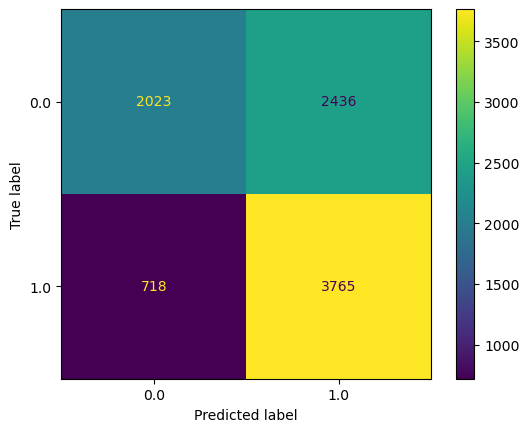

In [ ]:
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot()

plt.show()


In [ ]:
(3758+2044) / (3758 + 725 + 2044 + 2415)

0.6488481324088571

In [ ]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not verified       0.61      0.84      0.70      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, and it achieved an accuracy of 65%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

In [ ]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008507
1,video_view_count,-0.000002
2,video_share_count,0.000007
3,video_download_count,-0.000241
4,video_comment_count,0.000022
5,claim_status_opinion,0.000404
6,author_ban_status_banned,-0.000020
7,author_ban_status_under review,-0.000002



- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not a great, but acceptable, predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 
- **Longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.**

##  Classification of videos based on their claim status

Below, I will build a `random forest` model and a `XGBoost` model. Then, will use the one with best predictive power for prediction.

In [ ]:
data["claim_status"].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

Approximately 50.3% of the dataset represents claims and 49.7% represents opinions, so the outcome variable is balanced.

Below, I will extract the length (character count) of each `video_transcription_text` and add this to the dataframe as a new column called `text_length` so that it can be used as a feature in the model.

In [ ]:
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [ ]:
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


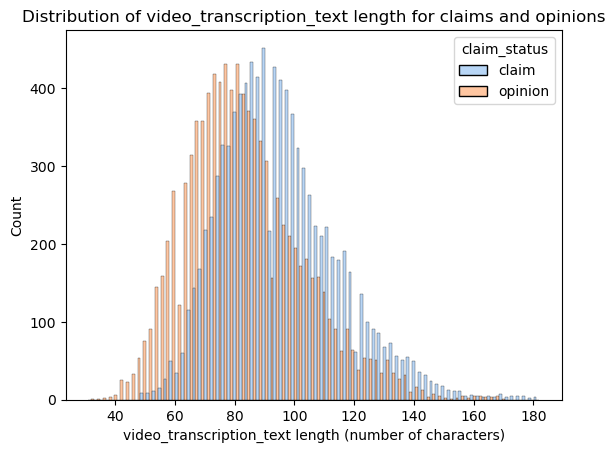

In [ ]:
sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()


Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters&mdash;about 13 more on average, as indicated in a previous cell.

**Feature selection and transformation**

In [ ]:
X = data.copy()
X = X.drop(['#', 'video_id'], axis=1)
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


In [ ]:
y = X['claim_status']

In [ ]:
X = X.drop(['claim_status'], axis=1)

X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


**Creating train/validate/test sets**

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

- The number of features (`11`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`11,450`) and both validation and testing data (`3,817`).

**Tokenizing video_transcription_text column**

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. I will use CountVectorizer to extract numerical features.

In [ ]:
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [ ]:
# Extracting numerical features from `video_transcription_text` in the training set

count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Placing the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Forming the final dataframe for training data
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Repeating the process for validation data to get n-gram for validation data without fiting it

validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,311333.875,14612.0,2880.125,44.0,72,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.000,311.0,13.000,1.0,96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.000,26235.0,2060.000,728.5,88,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.000,1230.0,564.000,248.0,83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.000,25320.0,2880.125,728.5,104,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Repeating the process for test data to get n-gram for test data without fiting it

test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.000,16591.0,622.000,312.0,107,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.000,36.0,17.000,1.0,69,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,311333.875,45382.5,2880.125,728.5,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.000,847.0,17.000,5.0,76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.000,15348.0,252.000,91.0,72,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Building random forest model**

Below, I will fit a random forest model to the training set and will use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [ ]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
rf_cv.fit(X_train_final, y_train)

CPU times: user 4min 16s, sys: 3.18 s, total: 4min 19s
Wall time: 4min 22s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'recall', 'accuracy', 'f1', 'precision'})

In [ ]:
rf_cv.best_score_

0.9948228253467271

In [ ]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

The model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

**Building XGBoost model**

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: user 5min 36s, sys: 10.8 s, total: 5min 47s
Wall time: 50.7 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [ ]:
xgb_cv.best_score_

0.9898176171763818

In [ ]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

This model also performs exceptionally well. Although its recall score is slightly lower than the random forest model's, its precision score is perfect.

### Evaluating models

**Evaluating Random forest model**

In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_val_final)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

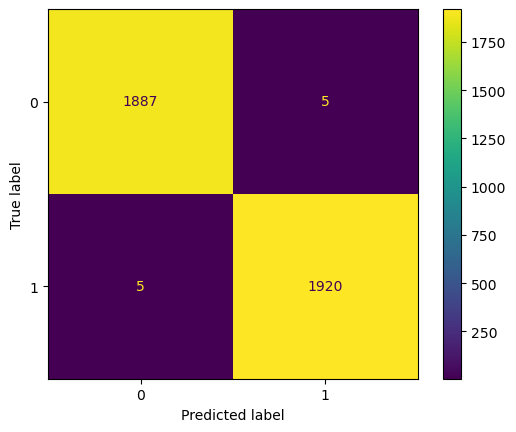

In [ ]:
log_cm = confusion_matrix(y_val, y_pred)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

log_disp.plot()

plt.show()

As the above confusion matrix shows, the model produce very few false negatives.

To evaluate the performance of the model, I will create a classification report that includes precision, recall, f1-score, and accuracy metrics.

In [ ]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 10 misclassifications - five false postives and five false negatives.

**Evaluating XGBoost model**

In [ ]:
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

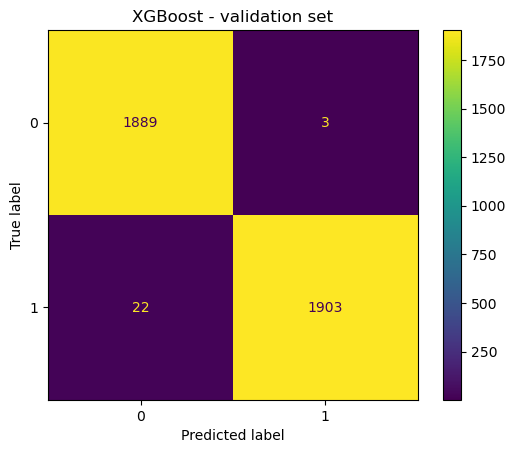

In [ ]:
log_cm = confusion_matrix(y_val, y_pred)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

log_disp.plot()

plt.title('XGBoost - validation set');
plt.show()



In [ ]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### Using the winning model for prediction

Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case random forest performed a little bit better, so it is the champion model.

Now, I will use the champion model to predict on the test data.

In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

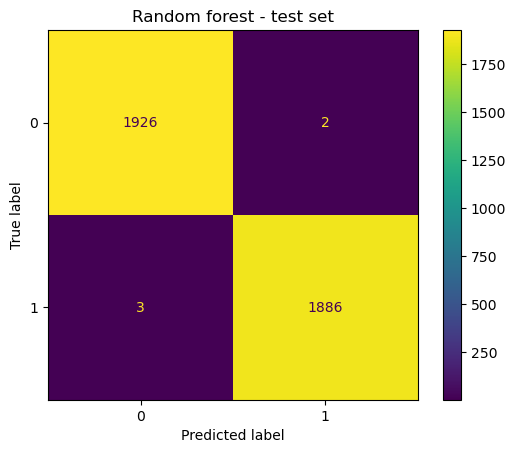

In [ ]:
log_cm = confusion_matrix(y_test, y_pred)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

log_disp.plot()

plt.title('Random forest - test set');
plt.show()

#### **Feature importances of champion model**



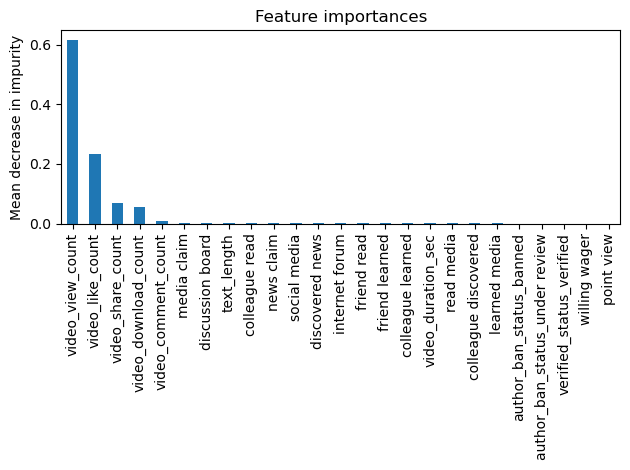

In [ ]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)
rf_importances = rf_importances.sort_values( ascending=False) 

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')

fig.tight_layout()


The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

#### Final observations

- The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received. 
- Because the model currently performs nearly perfectly, there is no need to engineer any new features.
- However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.